# probability

## objectives

* probability, definitions and concepts
* combinatorics, definitions and concepts


* know how to reason about random variables
* be able to appropriatly choose probability distributions to model things

# afternoon

## random variables

random variables formalize a mapping we have been implicitly using already:

$ X(s) : S\Rightarrow \Re $

* capital letters refer to random variables.
* lowercase to refer to specific realization.
* $P(X=x)$
* $ X \sim dist(\alpha, \beta, ...) $ means X is distributed as, dist with parameters $(\alpha, \beta, ...)$.
* "i.i.d."
* discrete or continuous

## cumulative distribution function

$ F_X(x) = P(X \le x) $

what kinds of bounds can we put on this function?

this works for both continuous and discrete functions.

## probability mass function / probability density function

for discrete variables:

$ f_X(x) = P(X = x), \forall\ x $

for continuous variables, think of it as the derivative of the CDF:

$ f_X(x)dx = P(x < X < x+dx) $

$ f_X(x) = \frac{dF_X(x)}{dx} $

## expected values

discrete:
$ E[X] = \sum\limits_{s\in S} s f_X(s) $

continuous:
$ E[X] = \int\limits_{-\infty}^{\infty}s f_X(s)ds$

a measure, but not the only one, of the central tendecy of a distribution


## variance

$ Var[x] = E[(x - E[X])^2] $



## standard deviation

$ \sigma(x) = \sqrt{Var[x]} $

useful because its units are in units of our original random variable.

## covariance  

Covariance is a measure of how much two variables change together.

To compute the covariance between two different variables:

$Cov[X,Y] = E[(x - E[X])(y - E[Y])]$

which is related to the

## correlation

$ Corr[X,Y] = \frac{E[(x - E[X])(y - E[Y])]}{\sigma(X)\sigma(Y)} = \frac{Cov[X,Y]}{\sigma(X)\sigma(Y)}$ 

## marginal distributions

marginal distribution takes --possibly not independent-- multivariate distribution and returns only a single dimension

accomplished by summing (discrete) or integrating (continuous)

$$
f_X(x) = \int_{-\infty}^\infty f_{XY}(x,s) ds
$$

## example:

![](https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png)

## discrete case:

|x1|x2|	x3|	x4|	py(Y)
--|--|--|--|--
y1|$\frac{4}{32}$|$\frac{2}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$
y2|$\frac{2}{32}$|$\frac{4}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$
y3|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{8}{32}$
y4|$\frac{8}{32}$|0|0|0|$\frac{8}{32}$
px(X)|?|?|?|?|?

## Anscombe's quartet

In [8]:
from numpy import array, amin, amax
%pylab inline


def fit(x):
    return 3+0.5*x

def anscombe():
    x =  array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
    y1 = array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
    y2 = array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
    y3 = array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
    x4 = array([8,8,8,8,8,8,8,19,8,8,8])
    y4 = array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])
    xfit = array( [amin(x), amax(x) ] )
    figure(figsize(12,8))
    subplot(221)
    plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), xticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    text(3,12, 'I', fontsize=20)

    subplot(222)
    plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), xticklabels=[], yticks=(4,8,12), yticklabels=[], xticks=(0,10,20))
    text(3,12, 'II', fontsize=20)

    subplot(223)
    plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    text(3,12, 'III', fontsize=20)
    setp(gca(), yticks=(4,8,12), xticks=(0,10,20))

    subplot(224)

    xfit = array([amin(x4),amax(x4)])
    plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), yticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    text(3,12, 'IV', fontsize=20)

    #verify the stats
    pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
    for x,y in pairs:
        print ('mean=%1.2f, std=%1.2f, r=%1.2f'%(mean(y), std(y), corrcoef(x,y)[0][1]))

Populating the interactive namespace from numpy and matplotlib


mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


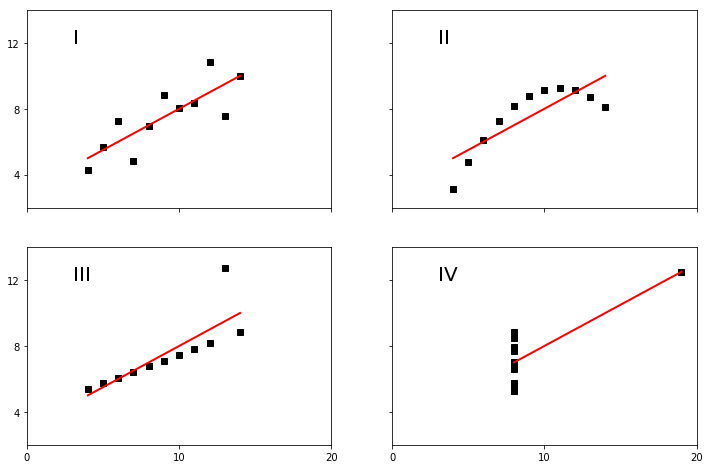

In [9]:
anscombe()

## correlation

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg" width=800 />

## distributions

* useful for modeling
* can help constrain thinking on probability questions

* useful thoughts:
    * Is data discrete or continuous?
    * Is data symmetric?
    * What limits are there on possible values for the data?
    * How likely are extreme values?

## common distributions

* Bernoulli
* binomial
* geometric
* Poisson
* exponential
* uniform
* Gaussian
* t-distribution

## Bernoulli:

Bernoulli distribution describes probability of "success" in a world with only two outcomes, in a single trial called a "Bernoulli trial."

pmf = $P[success] = p \text{ , }  P[failure] = 1-p $

mean: $ E[x] = p $

variance: $ Var(x) = p(1-p) $

## geometric:  

Defines the probability of the first "success" in a series of Bernoulli trials happens on the k$^{th}$ attempt.

pmf: $ P[X=k] = p (1-p)^{k-1}, \forall k \in \{0, 1,...\}$

mean: $ \frac{1}{p} $

variance: $ \frac{1-p}{p^2} $

## binomial:  

Defines the probability of having k successes in n Bernoulli trials

pmf: $P[X=k] = {n \choose k}p^k(1-p)^{n-k}, \forall k \in \{0, 1,..., n\} $

mean: $np$

var: $np(1-p)$


## Poisson

Defines the probability of some number of events in a specific time period.

pmf: $P[X=k] = \frac{\lambda^k e^{-\lambda}}{k!},\forall k \in \{0,1,2,...\}$

mean: $\lambda $

variance: $ \lambda $

## uniform (continuous)

pdf: $ f(x) = \frac{1}{b-a}, \forall x\in[a, b], \text{0 otherwise} $

mean: $ \frac{a+b}{2} $

variance: $ \frac{(b-a)^2}{12}$

## Gaussian

(also called normal)

pdf: $\frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x - \mu)^2}{2\sigma^2}) $

mean: $\mu$

variance: $ \sigma^2 $

## A couple other distributions:

## exponential

cdf: $ P[T < t] = 1 - exp(\lambda t), x \ge 0, \lambda \ge 0 $

mean: $ \frac{1}{\lambda} $

variance: $ \frac{1}{\lambda^2} $

## students-t

pdf: $\frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi}\Gamma(\frac{\nu}{2})}(1+\frac{x^2}{\nu})^{-\frac{\nu+1}{2}}$  
$\nu$ is degrees of freedom
mean: 0  
variance: $\frac{\nu}{\nu-2}$ for $\nu \gt 2$, $\infty$ for $1 \lt \nu \le 2$, otherwise undefined